In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Load the trained model
model = tf.keras.models.load_model('vgg16_brain_tumor_model.h5')

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 21,138,500
Trainable params: 21,138,500
Non-trainable params: 0
_________________________________________________________________


In [4]:
base_dir = "input"
test_dir = os.path.join(base_dir, 'Testing')
(IMG_HEIGHT, IMG_WIDTH) = (224, 224)
batch_size = 32

In [5]:
# Testing data as batches of tensor image data
test_image_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = test_image_generator.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode="categorical"
)


Found 374 images belonging to 4 classes.


In [6]:
labels = test_data_generator.class_indices
print(labels)

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}


In [7]:
# Learn about dataset labels
dataset_labels = sorted(test_data_generator.class_indices.items())
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Glioma_Tumor' 'Meningioma_Tumor' 'No_Tumor' 'Pituitary_Tumor']


In [8]:
# Check the shape
test_image_batch, test_label_batch = next(iter(test_data_generator))
true_label_ids = np.argmax(test_label_batch, axis=-1)

print("Test batch shape:", test_image_batch.shape)
print("True label IDs shape:", true_label_ids.shape)

Test batch shape: (32, 224, 224, 3)
True label IDs shape: (32,)


In [9]:
# Predict probabilities for the test set
yhat_probs = model.predict(test_image_batch)

1/1 [==============================] - 2s 2s/step


In [10]:
yhat_probs

array([[1.97251872e-12, 1.16570064e-07, 9.99999881e-01, 3.88555996e-08],
       [1.16669680e-05, 1.41456304e-03, 5.80774431e-05, 9.98515666e-01],
       [1.04539299e-06, 3.11342214e-04, 9.99645710e-01, 4.19184325e-05],
       [9.99960065e-01, 7.70517363e-06, 5.83968040e-06, 2.63398470e-05],
       [2.24959873e-09, 1.54188747e-05, 9.99984384e-01, 1.69573482e-07],
       [2.04724519e-12, 1.00000000e+00, 1.37206479e-11, 3.42610340e-09],
       [2.18560050e-08, 2.07464309e-05, 9.99979019e-01, 2.85853844e-07],
       [1.00000000e+00, 5.59923252e-15, 5.85875241e-15, 8.87599673e-13],
       [4.53405285e-14, 1.00000000e+00, 7.01832018e-16, 2.12525245e-12],
       [1.20789504e-04, 9.98744130e-01, 2.01102066e-05, 1.11497147e-03],
       [4.63599060e-03, 3.12050950e-04, 1.41363153e-05, 9.95037735e-01],
       [4.14986857e-07, 1.85527895e-02, 4.33752838e-08, 9.81446743e-01],
       [1.07771799e-12, 1.00000000e+00, 8.58828687e-13, 2.97678340e-11],
       [2.86914775e-17, 1.00000000e+00, 7.50418767e

In [11]:
# Convert numeric classes to real name class
yhat_classes = np.argmax(yhat_probs, axis=-1)
pred_class = np.array(list(list(labels.keys())[list(labels.values()).index(i)] for i in yhat_classes))

In [12]:
pred_class

array(['no_tumor', 'pituitary_tumor', 'no_tumor', 'glioma_tumor',
       'no_tumor', 'meningioma_tumor', 'no_tumor', 'glioma_tumor',
       'meningioma_tumor', 'meningioma_tumor', 'pituitary_tumor',
       'pituitary_tumor', 'meningioma_tumor', 'meningioma_tumor',
       'glioma_tumor', 'pituitary_tumor', 'meningioma_tumor',
       'glioma_tumor', 'meningioma_tumor', 'glioma_tumor',
       'meningioma_tumor', 'pituitary_tumor', 'glioma_tumor',
       'pituitary_tumor', 'pituitary_tumor', 'no_tumor',
       'meningioma_tumor', 'meningioma_tumor', 'meningioma_tumor',
       'glioma_tumor', 'meningioma_tumor', 'meningioma_tumor'],
      dtype='<U16')

In [13]:
# Calculate metrics
testy = np.array([np.where(r == 1)[0][0] for r in test_label_batch])
test_real = np.array(list(list(labels.keys())[list(labels.values()).index(i)] for i in testy))

In [14]:
testy

array([2, 3, 2, 0, 2, 1, 2, 0, 1, 1, 3, 3, 1, 1, 0, 3, 1, 0, 1, 0, 1, 3,
       0, 3, 3, 2, 1, 1, 1, 0, 3, 3], dtype=int64)

In [15]:
# Accuracy
accuracy = accuracy_score(testy, yhat_classes)
print('Accuracy:', accuracy)

# Precision
precision = precision_score(testy, yhat_classes, average='macro')
print('Precision:', precision)

# Recall
recall = recall_score(testy, yhat_classes, average='macro')
print('Recall:', recall)

# F1 Score
f1 = f1_score(testy, yhat_classes, average='macro')
print('F1 score:', f1)

Accuracy: 0.9375
Precision: 0.9615384615384616
Recall: 0.9444444444444444
F1 score: 0.9479166666666666


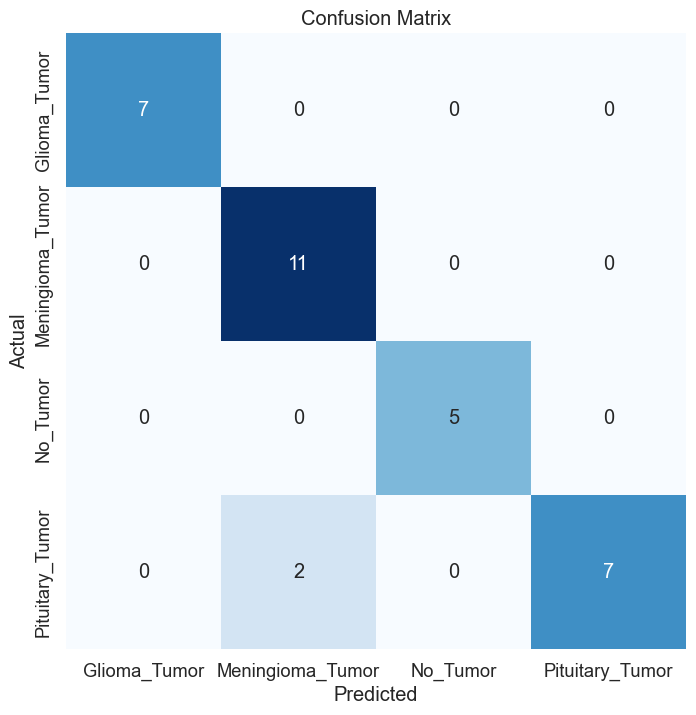

In [16]:
# Confusion Matrix
conf_matrix = confusion_matrix(testy, yhat_classes)
#print('Confusion Matrix:')
#print(conf_matrix)

# Plot colored confusion matrix
def plot_confusion_matrix(conf_matrix, classes):
    plt.figure(figsize=(8, 8))
    sns.set(font_scale=1.2)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, classes=dataset_labels)